In [9]:
import time

import requests
from bs4 import BeautifulSoup
from lxml import etree
url="https://m.lianjia.com/chuzu/bj/zufang"
pre="https://m.lianjia.com/chuzu/bj/zufang/"
# url="https://m.lianjia.com/chuzu/aj/config/filter?city_id=110000"
# url1="https://m.lianjia.com/chuzu/bj/zufang/pg2/?ajax=1"
header={
    'user-agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Mobile Safari/537.36',
}
# session=requests.session()
# resp1=session.get(url,headers=header)
# html=resp1.content.decode("utf-8")
# soup = BeautifulSoup(html, 'html.parser')
# for item in soup.find_all('div',class_='content__item'):
#     code=str(item.get("data-housecode"))
#     url1=pre+code+".html"
#     print(url1)
#     resp2=session.get(url1,headers=header)
#     item_html=resp2.content.decode("utf-8")
#     # soup1=BeautifulSoup(item_html,'html.parser')
#     # info=soup1.find('div',class_="box content__detail--info")
#     # print(info)
#     break

<!DOCTYPE html>
<html lang="zh">
<head>
  <meta charset="UTF-8">
  <meta name="apple-mobile-web-app-title" content="租房">
  <meta name="apple-mobile-web-app-capable" content="yes">
  <meta name="apple-mobile-web-app-status-bar-style" content="black" />
  <meta name="format-detection" content="telephone=yes">
  <meta name="viewport" content="initial-scale=1, maximum-scale=1, minimum-scale=1, user-scalable=no, viewport-fit=cover">
  <meta name="applicable-device" content="mobile">
  <meta http-equiv="cleartype" content="on">
  <meta http-equiv="Cache-Control" content="no-transform " />
    <!-- dns预解析 -->
  <meta http-equiv="x-dns-prefetch-control" content="on" />
  <link rel="dns-prefetch" href="//s1.ljcdn.com">
  <link rel="dns-prefetch" href="//ke-image.ljcdn.com">
  <link rel="dns-prefetch" href="//dig.lianjia.com">
  <!-- seo相关信息 -->
  <meta name="description" content="贝壳北京租房网,提供整租·柳岸景园 2室2厅 南/北出租房源信息,此房源位于北京通州乔庄的柳岸景园,2室98.12㎡4515元.找租房房源,就来北京贝壳租房!">
  <meta name="keywords" content="整
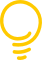
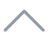
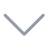
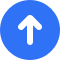

In [93]:
print(item_html)

title = str(soup.find_all("h2", class_="page-title-h2")[0].text).lstrip().rstrip()

In [104]:
soup = BeautifulSoup(item_html, 'html.parser')
title = str(soup.find_all("h2", class_="page-title-h2")[0].text).lstrip().rstrip()
str=title.split("·")
str[1].split(" ")

['柳岸景园', '2室2厅', '南/北']

In [98]:
import  re
pattern=re.compile(r'<a class="map--container" href=(.*?)>')
loc=pattern.findall(str(item_html))[0]
loc=loc.split("?coord=")[1]
loc

'116.70193,39.899597"'

In [99]:
loc=loc.split(',')
w=loc[0]
q=loc[1].split("\"")[0]

In [100]:
w,q


('116.70193', '39.899597')

In [37]:
pattern=re.compile(r'<span>(.*?)</span>')
info=pattern.findall(str(item_html))

In [38]:
info[1]
info

['房租',
 '4515元/月',
 '户型',
 '面积',
 '98.12㎡',
 '98.12㎡',
 '南 北',
 '3天前',
 '随时入住',
 '中楼层/7层',
 '无',
 '暂无数据',
 '民水',
 '民电',
 '有',
 '集中供暖',
 '租期：',
 '看房：',
 '小区：',
 '风险提示：',
 '贝壳官方投诉电话：',
 '评分:4.8 | 6次评价',
 '',
 '评分:4.8 | 61次评价',
 '本小区好评经纪人',
 '评分:4.9 | 223次评价',
 '本小区好评经纪人',
 'BJ1634464272102719488',
 '您是在寻找',
 '2室2厅2卫',
 '的房子吗']

In [29]:
len(info)


28

In [30]:
pattern=re.compile(r'<span class="fr">(.*?)</span>')
pattern.findall(str(item_html))

['33米',
 '1112米',
 '2800                                    元/月',
 '3200                                    元/月',
 '3800                                    元/月']

In [62]:
soup = BeautifulSoup(item_html, 'html.parser')
infos=soup.find_all("div",class_="box content__detail--info")[0]
infos

<div class="box content__detail--info">
<ul>
<li>
<span>房租</span>
<span>12500元/月</span>
</li>
<li>
<span>户型</span>
<span>
                    4室2厅2卫                </span>
</li>
<li>
<span>面积</span>
<span>150.00㎡</span>
</li>
</ul>
</div>

In [63]:
pattern=re.compile(r'<span>(\s*.*?)</span>')
infos=pattern.findall(str(infos))
infos

['房租',
 '12500元/月',
 '户型',
 '\n                    4室2厅2卫                ',
 '面积',
 '150.00㎡']

In [59]:
infos[3].split("\n")[1].lstrip().rstrip()

'4室2厅2卫'

In [77]:
info=soup.find_all('p',class_="content__item__tag--wrapper")[0]
pattern=re.compile(r'<i.*>(.*?)</i>')
des=pattern.findall(str(info))
" ".join(des)

'近地铁 精装 集中供暖 双卫生间 随时看房'

In [84]:
infos=soup.find_all("ul",class_="page-house-info-list")[0]

In [85]:
pattern1=re.compile(r'<span>(.*?)</span>')
pattern1.findall(str(infos))

['150.00㎡',
 '南 北',
 '今天',
 '随时入住',
 '低楼层/26层',
 '有',
 '暂无数据',
 '民水',
 '民电',
 '有',
 '集中供暖']

In [105]:
dic={}
dic["a"]=1
dic["b"]=2
len(dic.keys())


2

In [108]:
dic["a"]=3
len(dic)

2

In [39]:
import re
import requests
from bs4 import BeautifulSoup
url1="https://m.lianjia.com/chuzu/bj/zufang/BJ1635267804368207872.html"
url2="https://m.lianjia.com/chuzu/bj/zufang/BJ1629800503925800960.html"
resp=requests.get(url1,headers=header)
html=resp.content.decode("utf-8")

In [40]:
soup = BeautifulSoup(html, 'html.parser')
text=soup.find_all('section',class_="list")
text

[]

<!DOCTYPE html>
<html lang="zh">
<head>
  <meta charset="UTF-8">
  <meta name="apple-mobile-web-app-title" content="租房">
  <meta name="apple-mobile-web-app-capable" content="yes">
  <meta name="apple-mobile-web-app-status-bar-style" content="black" />
  <meta name="format-detection" content="telephone=yes">
  <meta name="viewport" content="initial-scale=1, maximum-scale=1, minimum-scale=1, user-scalable=no, viewport-fit=cover">
  <meta name="applicable-device" content="mobile">
  <meta http-equiv="cleartype" content="on">
  <meta http-equiv="Cache-Control" content="no-transform " />
    <!-- dns预解析 -->
  <meta http-equiv="x-dns-prefetch-control" content="on" />
  <link rel="dns-prefetch" href="//s1.ljcdn.com">
  <link rel="dns-prefetch" href="//ke-image.ljcdn.com">
  <link rel="dns-prefetch" href="//dig.lianjia.com">
  <!-- seo相关信息 -->
  <meta name="description" content="贝壳北京租房网,提供整租·太阳公元北区 2室1厅 南/北出租房源信息,此房源位于北京朝阳太阳宫的太阳公元北区,2室85.00㎡14770元.找租房房源,就来北京贝壳租房!">
  <meta name="keywords" cont
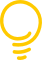
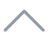
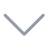
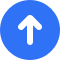

In [41]:
# pattern=re.compile(r'<span class="fr">(.*?)</span>')
# pattern.findall(str(text))[0]
print(html)

In [1]:
import pandas as pd


In [4]:
df=pd.read_csv("codes.csv",header=None,names=['house_code','city','area','bizcircle'])
df.head(5)

,house_code,city,area,bizcircle
0,BJ1564859542443917312,北京,海淀,西北旺
1,BJ1564867555972087808,北京,朝阳,中央别墅区
2,BJ1564879648565755904,北京,昌平,北七家
3,BJ1564889162052534272,北京,朝阳,亚运村
4,BJ1564895392078757888,北京,朝阳,中央别墅区


In [5]:
df['house_code'].values


array(['BJ1564859542443917312', 'BJ1564867555972087808',
       'BJ1564879648565755904', ..., 'BJ2907084489027231744',
       'BJ2907109530742046720', 'BJ2907122659483992064'], dtype=object)

In [6]:
df['city'].values


array(['北京', '北京', '北京', ..., '北京', '北京', '北京'], dtype=object)